<AxesSubplot:>

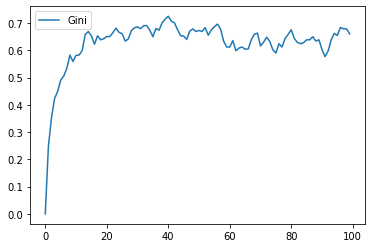

In [1]:
from model import *

model = MoneyModel(50, 10, 10)
for i in range(100):
    model.step()

gini = model.datacollector.get_model_vars_dataframe()
gini.plot()

In [2]:
agent_wealth = model.datacollector.get_agent_vars_dataframe()
agent_wealth.head()

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1

<AxesSubplot:xlabel='Step'>

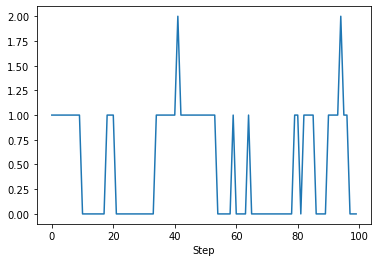

In [4]:
one_agent_wealth = agent_wealth.xs(14, level="AgentID")
one_agent_wealth.Wealth.plot()

In [5]:
from mesa.batchrunner import BatchRunner

fixed_params = {"width": 10,
               "height": 10}
variable_params = {"N": range(10, 500, 10)}

batch_run = BatchRunner(MoneyModel,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=100,
                        model_reporters={"Gini": compute_gini})
batch_run.run_all()

245it [01:46,  2.30it/s]


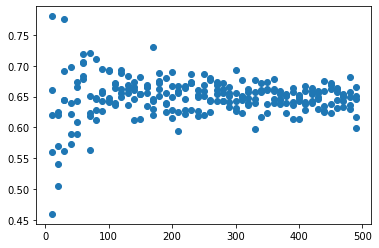

In [6]:
import matplotlib.pyplot as plt

run_data = batch_run.get_model_vars_dataframe()
run_data.head()
plt.scatter(run_data.N, run_data.Gini)

In [9]:
data_collector_agents = batch_run.get_collector_agents()

data_collector_agents[(10,2)]

Wealth
Step AgentID        
0    0             1
     1             1
     2             1
     3             1
     4             1
...              ...
99   5             2
     6             0
     7             4
     8             2
     9             0

[1000 rows x 1 columns]

In [10]:
data_collector_model = batch_run.get_collector_model()

data_collector_model[(10,1)]

,Gini
0,0.00
1,0.00
2,0.00
3,0.00
4,0.18
...,...
95,0.78
96,0.78
97,0.78
98,0.78
